# 추세와 모멘텀 지표 기반의 트레이딩 전략 설계   

## 지지와 저항 지표

In [1]:
!pip install pandas_datareader
!pip install finance-datareader



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: C:\Users\jh102\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: C:\Users\jh102\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


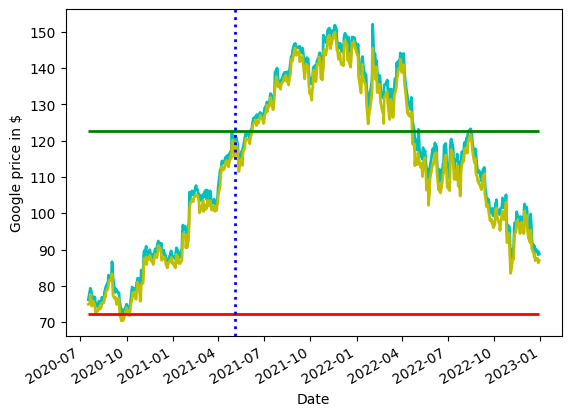

In [9]:
import pandas as pd
#from pandas_datareader import data
import FinanceDataReader as fdr

start_date = '2014-01-01'
end_date = '2023-01-01'

#Yahoo finance에서API제공을 중지함. 따라서 FinanceDataReader 이용
goog_data2 = fdr.DataReader('GOOG', start_date, end_date)

goog_data=goog_data2.tail(620)
lows=goog_data['Low']
highs=goog_data['High']

import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Google price in $')
highs.plot(ax=ax1, color='c', lw=2.)
lows.plot(ax=ax1,color='y',lw=2.)
plt.hlines(highs.head(200).max(),lows.index.values[0],lows.index.values[-1],linewidth=2,color='g')
plt.hlines(highs.head(200).min(),lows.index.values[0],lows.index.values[-1],linewidth=2,color='r')
plt.axvline(linewidth=2,color='b',x=lows.index.values[200],linestyle=':')
plt.show()

In [14]:
import numpy as np

start_date = '2014-01-01'
end_date = '2023-01-01'

goog_data = fdr.DataReader('GOOG', start_date, end_date)
print('File data found...reading GOOG data')

goog_data_signal = pd.DataFrame(index=goog_data.index)
goog_data_signal['price'] = goog_data['Adj Close']

File data found...reading GOOG data


In [15]:
goog_data_signal

,price
Date,
2014-01-02,27.724083
2014-01-03,27.521841
2014-01-06,27.828691
2014-01-07,28.365179
2014-01-08,28.424210
...,...
2022-12-23,89.809998
2022-12-27,87.930000
2022-12-28,86.459999


In [21]:
def trading_support_resistance(data, bin_width=20):
    data['sup_tolerance'] = pd.Series(np.zeros(len(data)))
    data['res_tolerance'] = pd.Series(np.zeros(len(data)))
    data['sup_count'] = pd.Series(np.zeros(len(data)))
    data['res_count'] = pd.Series(np.zeros(len(data)))
    data['sup'] = pd.Series(np.zeros(len(data)))
    data['res'] = pd.Series(np.zeros(len(data)))
    data['positon'] = pd.Series(np.zeros(len(data)))
    data['signal'] = pd.Series(np.zeros(len(data)))
    in_support = 0
    in_resistance=0
    for x in range((bin_width -1) + bin_width, len(data)):
        data_section = data[x-bin_width:x+1]
        support_level=min(data_section['price'])
        resistance_level=max(data_section['price'])
        range_level=resistance_level-support_level
        data['res'][x]=resistance_level
        data['sup'][x]=support_level
        data['sup_tolerance'][x]=support_level +0.2*range_level
        data['res_tolerance'][x]=resistance_level -0.2*range_level
        
        if (data['price'][x] >= data['res_tolerance'][x]) and (data['price'][x] <= data['res'][x]):
    

            in_resistance+=1
            data['res_count'][x]=in_resistance
        elif data['price'][x] <= data['sup_tolerance'][x] and data['price'][x] >= data['sup'][x]:


            in_support+=1
            data['sup_count'][x] = in_support
        else:
            in_support=0
            in_resistance=0
        if in_resistance>2:
            data['signal'][x]=1
        elif in_support >2:
            data['signal'][x]=0
        else:
            data['signal'][x]=data['signal'][x-1]

    data['position'] = data['signal'].diff()


In [22]:
trading_support_resistance(goog_data_signal)

In [23]:
goog_data_signal

,price,sup_tolerance,res_tolerance,sup_count,res_count,sup,res,positon,signal,position
Date,,,,,,,,,,
2014-01-02,27.724083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-03,27.521841,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-06,27.828691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-07,28.365179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-08,28.424210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-12-23,89.809998,90.898001,98.811998,7.0,NaN,88.260002,101.449997,NaN,0.0,0.0
2022-12-27,87.930000,90.633999,98.745998,8.0,NaN,87.930000,101.449997,NaN,0.0,0.0
2022-12-28,86.459999,89.457999,98.451997,9.0,NaN,86.459999,101.449997,NaN,0.0,0.0


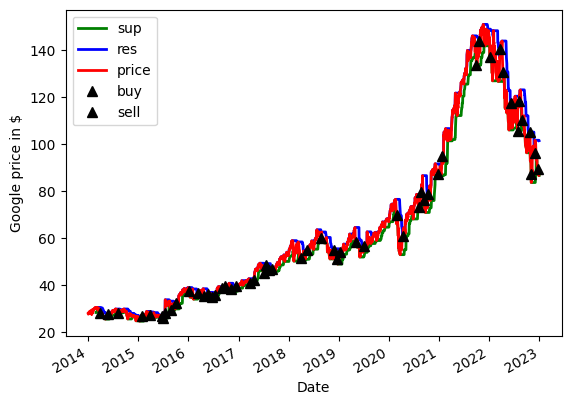

In [24]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111,ylabel='Google price in $')


goog_data_signal['sup'].plot(ax=ax1,color='g',lw=2.)
goog_data_signal['res'].plot(ax=ax1,color='b',lw=2.)
goog_data_signal['price'].plot(ax=ax1,color='r',lw=2.)

ax1.plot(goog_data_signal.loc[goog_data_signal.position ==1.0].index, \
         goog_data_signal.price[goog_data_signal.position ==1.0], '^', markersize=7, color='k',label='buy')

ax1.plot(goog_data_signal.loc[goog_data_signal.position ==-1.0].index, \
         goog_data_signal.price[goog_data_signal.position ==-1.0], '^', markersize=7, color='k',label='sell')

plt.legend()
plt.show()


## 시그널의 생성

### 단순이동평균 SMA, simple moving average

Simple Moving Average
SMA = ( Sum ( Price, n ) ) / n    

Where: n = Time Period

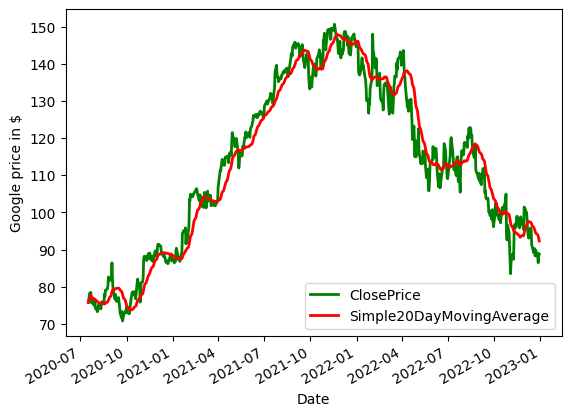

In [25]:
start_date = '2014-01-01'
end_date = '2023-01-01'

goog_data = fdr.DataReader('GOOG', start_date, end_date)
goog_data = goog_data2.tail(620)

close = goog_data['Close']


import statistics as stats

time_period = 20 # 20일 이동평균  
history = [] # 과거 가격 트래킹
sma_values = [] # 단순 이동 평균 값 트래킹
for close_price in close:
  history.append(close_price)
  if len(history) > time_period: # 최근 영업일만 계산
    del (history[0])

  sma_values.append(stats.mean(history))

goog_data = goog_data.assign(ClosePrice=pd.Series(close, index=goog_data.index))
goog_data = goog_data.assign(Simple20DayMovingAverage=pd.Series(sma_values, index=goog_data.index))

close_price = goog_data['ClosePrice']
sma = goog_data['Simple20DayMovingAverage']

import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Google price in $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
sma.plot(ax=ax1, color='r', lw=2., legend=True)
plt.show()

### 지수 이동 편균 EMA, exponential moving average 

EMA = ( P - EMAp ) * K + EMAp

Where:
P = Price for the current period
EMAp = the Exponential moving Average for the previous period
K = the smoothing constant, equal to 2 / (n + 1)
n = the number of periods in a simple moving average roughly approximated by the EMA

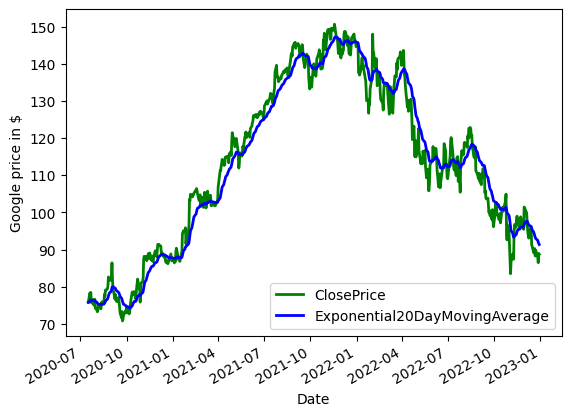

In [26]:
'''
start_date = '2014-01-01'
end_date = '2023-01-01'

goog_data = fdr.DataReader('GOOG', start_date, end_date)
goog_data = goog_data2.tail(620)

close = goog_data['Close']
'''

num_periods = 20
K = 2 / (num_periods + 1) # 평활화(smoothing) 상수
ema_p = 0

ema_values = [] # 계산된 EMA값은 이쪽으로 넣어라
for close_price in close:
  if (ema_p == 0): # 첫 번째 관찰된 EMA = 현재가격
    ema_p = close_price
  else:
    ema_p = (close_price - ema_p) * K + ema_p

  ema_values.append(ema_p)

goog_data = goog_data.assign(ClosePrice=pd.Series(close, index=goog_data.index))
goog_data = goog_data.assign(Exponential20DayMovingAverage=pd.Series(ema_values, index=goog_data.index))

close_price = goog_data['ClosePrice']
ema = goog_data['Exponential20DayMovingAverage']

import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Google price in $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
ema.plot(ax=ax1, color='b', lw=2., legend=True)
plt.show()

### 절대 가격 오실레이터 APO, Absolute Price Oscillator

APO = Fast Exponential Moving Average - Slow Exponential Moving Average

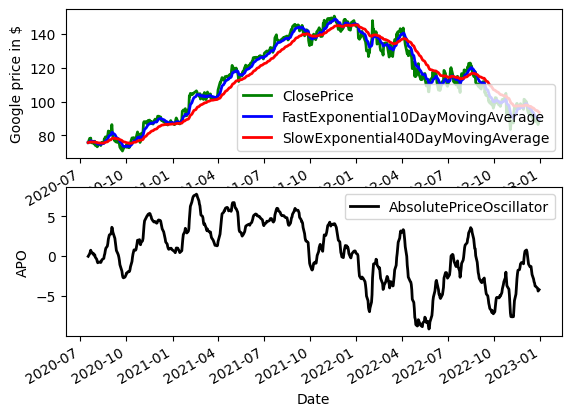

In [27]:
num_periods_fast = 10 # fast EMA 기간 
K_fast = 2 / (num_periods_fast + 1) # fast EMA 평활벡터 
ema_fast = 0
num_periods_slow = 40 # slow EMA 기간 
K_slow = 2 / (num_periods_slow + 1) # slow EMA 평활화 벡터 
ema_slow = 0

ema_fast_values = [] # 시각화 목적을 위해 빠른 EMA값을 보유한다 
ema_slow_values = [] # 위와 동일, 다만 느린 EMA 값.
apo_values = [] # 계산된 APO 값 트래킹 
for close_price in close:
  if (ema_fast == 0): # 첫 번째 관찰값. 
    ema_fast = close_price
    ema_slow = close_price
  else:
    ema_fast = (close_price - ema_fast) * K_fast + ema_fast
    ema_slow = (close_price - ema_slow) * K_slow + ema_slow

  ema_fast_values.append(ema_fast)
  ema_slow_values.append(ema_slow)
  apo_values.append(ema_fast - ema_slow)

goog_data = goog_data.assign(ClosePrice=pd.Series(close, index=goog_data.index))
goog_data = goog_data.assign(FastExponential10DayMovingAverage=pd.Series(ema_fast_values, index=goog_data.index))
goog_data = goog_data.assign(SlowExponential40DayMovingAverage=pd.Series(ema_slow_values, index=goog_data.index))
goog_data = goog_data.assign(AbsolutePriceOscillator=pd.Series(apo_values, index=goog_data.index))

close_price = goog_data['ClosePrice']
ema_f = goog_data['FastExponential10DayMovingAverage']
ema_s = goog_data['SlowExponential40DayMovingAverage']
apo = goog_data['AbsolutePriceOscillator']

import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(211, ylabel='Google price in $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
ema_f.plot(ax=ax1, color='b', lw=2., legend=True)
ema_s.plot(ax=ax1, color='r', lw=2., legend=True)
ax2 = fig.add_subplot(212, ylabel='APO')
apo.plot(ax=ax2, color='black', lw=2., legend=True)
plt.show()

### 이동평균 수렴 발산 MACD, Moving Average Convergence Divergence

MACD = FastMA - SlowMA

Where:
FastMA is the shorter moving average and SlowMA is the longer moving average.
SignalLine = MovAvg (MACD)
MACD Histogram = MACD - SignalLine

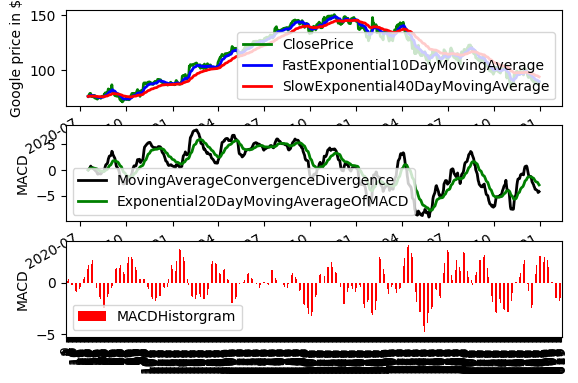

In [28]:
num_periods_fast = 10 
K_fast = 2 / (num_periods_fast + 1) 
ema_fast = 0
num_periods_slow = 40 
K_slow = 2 / (num_periods_slow + 1) 
ema_slow = 0
num_periods_macd = 20 
K_macd = 2 / (num_periods_macd + 1) 
ema_macd = 0

ema_fast_values = [] 
ema_slow_values = [] 
macd_values = [] 
macd_signal_values = [] 
macd_historgram_values = [] # MACD - MACD-EMA
for close_price in close:
  if (ema_fast == 0):
    ema_fast = close_price
    ema_slow = close_price
  else:
    ema_fast = (close_price - ema_fast) * K_fast + ema_fast
    ema_slow = (close_price - ema_slow) * K_slow + ema_slow

  ema_fast_values.append(ema_fast)
  ema_slow_values.append(ema_slow)

  macd = ema_fast - ema_slow # MACD = fast_MA - slow_EMA
  if ema_macd == 0:
    ema_macd = macd
  else:
    ema_macd = (macd - ema_macd) * K_macd + ema_macd # signal = EMA of MACD values

  macd_values.append(macd)
  macd_signal_values.append(ema_macd)
  macd_historgram_values.append(macd - ema_macd)

goog_data = goog_data.assign(ClosePrice=pd.Series(close, index=goog_data.index))
goog_data = goog_data.assign(FastExponential10DayMovingAverage=pd.Series(ema_fast_values, index=goog_data.index))
goog_data = goog_data.assign(SlowExponential40DayMovingAverage=pd.Series(ema_slow_values, index=goog_data.index))
goog_data = goog_data.assign(MovingAverageConvergenceDivergence=pd.Series(macd_values, index=goog_data.index))
goog_data = goog_data.assign(Exponential20DayMovingAverageOfMACD=pd.Series(macd_signal_values, index=goog_data.index))
goog_data = goog_data.assign(MACDHistorgram=pd.Series(macd_historgram_values, index=goog_data.index))

close_price = goog_data['ClosePrice']
ema_f = goog_data['FastExponential10DayMovingAverage']
ema_s = goog_data['SlowExponential40DayMovingAverage']
macd = goog_data['MovingAverageConvergenceDivergence']
ema_macd = goog_data['Exponential20DayMovingAverageOfMACD']
macd_histogram = goog_data['MACDHistorgram']

import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(311, ylabel='Google price in $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
ema_f.plot(ax=ax1, color='b', lw=2., legend=True)
ema_s.plot(ax=ax1, color='r', lw=2., legend=True)
ax2 = fig.add_subplot(312, ylabel='MACD')
macd.plot(ax=ax2, color='black', lw=2., legend=True)
ema_macd.plot(ax=ax2, color='g', lw=2., legend=True)
ax3 = fig.add_subplot(313, ylabel='MACD')
macd_histogram.plot(ax=ax3, color='r', kind='bar', legend=True, use_index=False)
plt.show()

### 볼린저 밴드 BBANDS, Bollinger Bands

Middle
 Band = n-period moving average

Upper
 Band = Middle Band + ( y * n-period standard deviation)

Lower Band = Middle Band - ( y *
 n-period standard deviation)

Where:

n = number of periods
y = factor to apply to the standard deviation value, (typical default for y = 2)

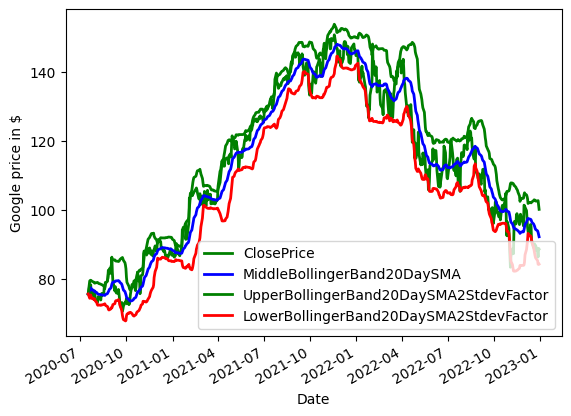

In [29]:
import statistics as stats
import math as math

time_period = 20 # SMA(중앙밴드) 히스토리 기간 길이
stdev_factor = 2 # 표준편차 스케일 벡터
history = [] # 가격 히스토리 
sma_values = [] # 이동평균 가격
upper_band = [] # upper band values
lower_band = [] # lower band values

for close_price in close:
  history.append(close_price)
  if len(history) > time_period:
    del (history[0])

  sma = stats.mean(history)
  sma_values.append(sma) # 중앙 밴드의 단순 이동평균
  variance = 0 # 분산 = 표준편차^2
  for hist_price in history:
    variance = variance + ((hist_price - sma) ** 2)

  stdev = math.sqrt(variance / len(history)) # square root

  upper_band.append(sma + stdev_factor * stdev)
  lower_band.append(sma - stdev_factor * stdev)

goog_data = goog_data.assign(ClosePrice=pd.Series(close, index=goog_data.index))
goog_data = goog_data.assign(MiddleBollingerBand20DaySMA=pd.Series(sma_values, index=goog_data.index))
goog_data = goog_data.assign(UpperBollingerBand20DaySMA2StdevFactor=pd.Series(upper_band, index=goog_data.index))
goog_data = goog_data.assign(LowerBollingerBand20DaySMA2StdevFactor=pd.Series(lower_band, index=goog_data.index))

close_price = goog_data['ClosePrice']
mband = goog_data['MiddleBollingerBand20DaySMA']
uband = goog_data['UpperBollingerBand20DaySMA2StdevFactor']
lband = goog_data['LowerBollingerBand20DaySMA2StdevFactor']

import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(111, ylabel='Google price in $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
mband.plot(ax=ax1, color='b', lw=2., legend=True)
uband.plot(ax=ax1, color='g', lw=2., legend=True)
lband.plot(ax=ax1, color='r', lw=2., legend=True)
plt.show()

### 상대강도지표 RSI, Relative Strength Indicator


RSI = 100 - (100 / (1 + RS))

Where:
RS(RelativeStrength) = ratio of smoothed average of n-period gains divided by the
absolute value of the smoothed average of n-period losses.

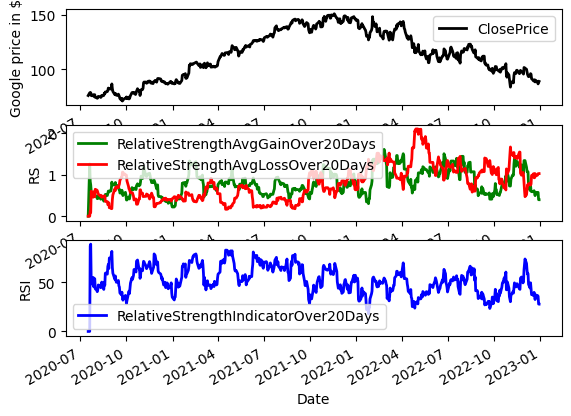

In [30]:
# import statistics as stats

time_period = 20 # 손익 계산 위한 룩백 구간
gain_history = [] # 룩백 기간 동안의 히스토리
loss_history = [] 
avg_gain_values = [] # 평균 이익 트래킹
avg_loss_values = [] 
rsi_values = [] # RSI 값 추적
last_price = 0 # current_price - last_price > 0 => gain. current_price - last_price < 0 => loss.

for close_price in close:
  if last_price == 0:
    last_price = close_price

  gain_history.append(max(0, close_price - last_price))
  loss_history.append(max(0, last_price - close_price))
  last_price = close_price

  if len(gain_history) > time_period: # 관찰 수는 룩백 기간과 동일
    del (gain_history[0])
    del (loss_history[0])

  avg_gain = stats.mean(gain_history) # 룩백 기간 평균이익 및 손실
  avg_loss = stats.mean(loss_history) 

  avg_gain_values.append(avg_gain)
  avg_loss_values.append(avg_loss)

  rs = 0
  if avg_loss > 0: # 0으로 나눠 정의되지 않는 경우 방지 
    rs = avg_gain / avg_loss

  rsi = 100 - (100 / (1 + rs))
  rsi_values.append(rsi)

goog_data = goog_data.assign(ClosePrice=pd.Series(close, index=goog_data.index))
goog_data = goog_data.assign(RelativeStrengthAvgGainOver20Days=pd.Series(avg_gain_values, index=goog_data.index))
goog_data = goog_data.assign(RelativeStrengthAvgLossOver20Days=pd.Series(avg_loss_values, index=goog_data.index))
goog_data = goog_data.assign(RelativeStrengthIndicatorOver20Days=pd.Series(rsi_values, index=goog_data.index))

close_price = goog_data['ClosePrice']
rs_gain = goog_data['RelativeStrengthAvgGainOver20Days']
rs_loss = goog_data['RelativeStrengthAvgLossOver20Days']
rsi = goog_data['RelativeStrengthIndicatorOver20Days']

import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(311, ylabel='Google price in $')
close_price.plot(ax=ax1, color='black', lw=2., legend=True)
ax2 = fig.add_subplot(312, ylabel='RS')
rs_gain.plot(ax=ax2, color='g', lw=2., legend=True)
rs_loss.plot(ax=ax2, color='r', lw=2., legend=True)
ax3 = fig.add_subplot(313, ylabel='RSI')
rsi.plot(ax=ax3, color='b', lw=2., legend=True)
plt.show()

### 표준편차 STDEV, standard deviation

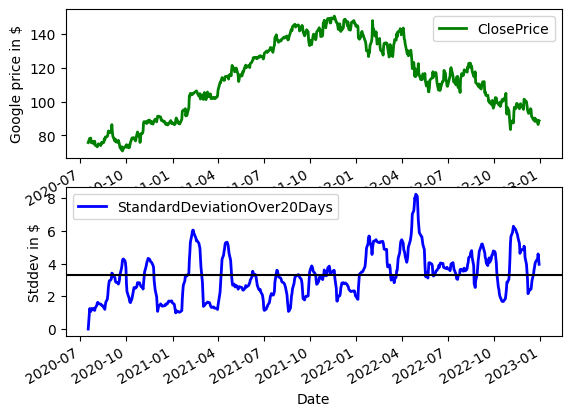

In [31]:
#import statistics as stats
#import math as math

time_period = 20 
history = [] 
sma_values = [] 
stddev_values = [] 

for close_price in close:
  history.append(close_price)
  if len(history) > time_period: 
    del (history[0])

  sma = stats.mean(history)
  sma_values.append(sma)
  variance = 0 
  for hist_price in history:
    variance = variance + ((hist_price - sma) ** 2)

  stdev = math.sqrt(variance / len(history))

  stddev_values.append(stdev)

goog_data = goog_data.assign(ClosePrice=pd.Series(close, index=goog_data.index))
goog_data = goog_data.assign(StandardDeviationOver20Days=pd.Series(stddev_values, index=goog_data.index))

close_price = goog_data['ClosePrice']
stddev = goog_data['StandardDeviationOver20Days']

import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(211, ylabel='Google price in $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
ax2 = fig.add_subplot(212, ylabel='Stddev in $')
stddev.plot(ax=ax2, color='b', lw=2., legend=True)
ax2.axhline(y=stats.mean(stddev_values), color='k')
plt.show()

### 모멘텀 MOM, Momentum

MOM =  Price - Price of n periods ago

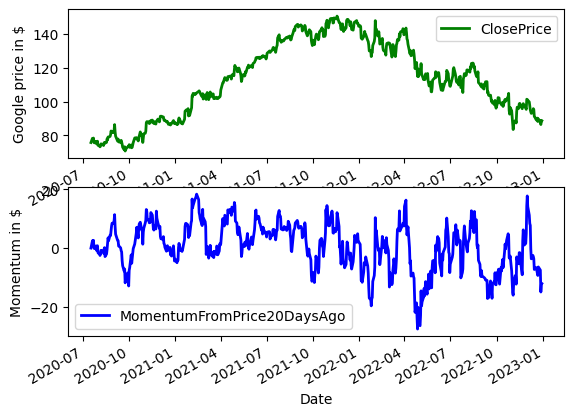

In [32]:
time_period = 20 
history = [] #
mom_values = [] 

for close_price in close:
  history.append(close_price)
  if len(history) > time_period: 
    del (history[0])

  mom = close_price - history[0]
  mom_values.append(mom)

goog_data = goog_data.assign(ClosePrice=pd.Series(close, index=goog_data.index))
goog_data = goog_data.assign(MomentumFromPrice20DaysAgo=pd.Series(mom_values, index=goog_data.index))

close_price = goog_data['ClosePrice']
mom = goog_data['MomentumFromPrice20DaysAgo']

import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(211, ylabel='Google price in $')
close_price.plot(ax=ax1, color='g', lw=2., legend=True)
ax2 = fig.add_subplot(212, ylabel='Momentum in $')
mom.plot(ax=ax2, color='b', lw=2., legend=True)
plt.show()

## 트레이딩 자산의 계절성 구현

In [40]:
start_date = '2001-01-01'
end_date = '2023-01-01'

goog_data = fdr.DataReader('GOOG', start_date, end_date)
goog_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512
...,...,...,...,...,...,...
2022-12-23,87.620003,90.099998,87.620003,89.809998,89.809998,17815000
2022-12-27,89.309998,89.500000,87.535004,87.930000,87.930000,15470900
2022-12-28,87.500000,88.519997,86.370003,86.459999,86.459999,17879600


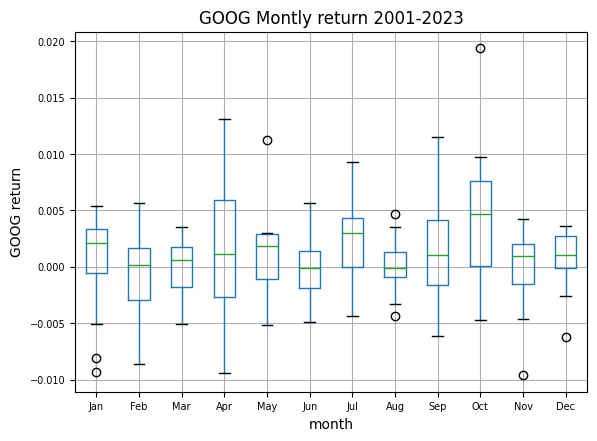

In [43]:
goog_monthly_return = goog_data['Adj Close'].pct_change().groupby(
    [goog_data['Adj Close'].index.year,
     goog_data['Adj Close'].index.month]).mean()

goog_montly_return_list = []
for i in range(len(goog_monthly_return)):
    month = goog_monthly_return.index[i][1]
    monthly_return = goog_monthly_return.iloc[i]
    goog_montly_return_list.append({'month': month, 'monthly_return': monthly_return})

goog_montly_return_list=pd.DataFrame(goog_montly_return_list,
                                     columns=('month','monthly_return'))

goog_montly_return_list.boxplot(column='monthly_return', by='month')
ax = plt.gca()
labels = [item.get_text() for item in ax.get_xticklabels()]
labels=['Jan','Feb','Mar','Apr','May','Jun',\
        'Jul','Aug','Sep','Oct','Nov','Dec']
ax.set_xticklabels(labels)
ax.set_ylabel('GOOG return')
plt.tick_params(axis='both', which='major', labelsize=7)
plt.title("GOOG Montly return 2001-2023")
plt.suptitle("")
plt.show()

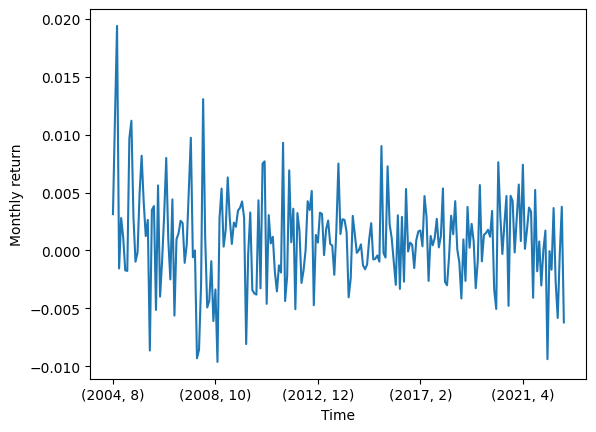

In [44]:
fig = plt.figure()
goog_data['Adj Close'].pct_change().groupby(
    [goog_data['Adj Close'].index.month])
ax1 = fig.add_subplot(111, ylabel='Monthly return')
goog_monthly_return.plot()
plt.xlabel('Time')
plt.show()

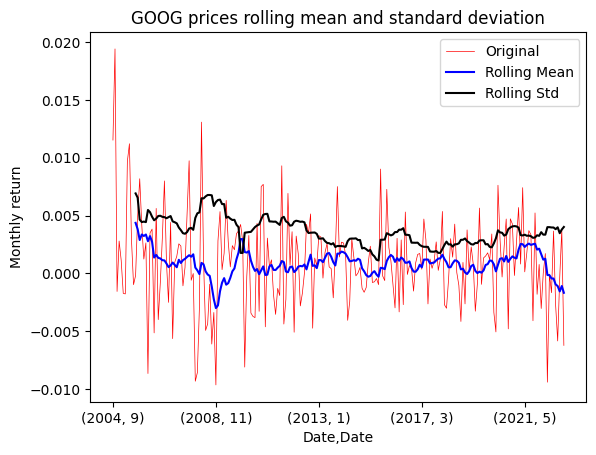

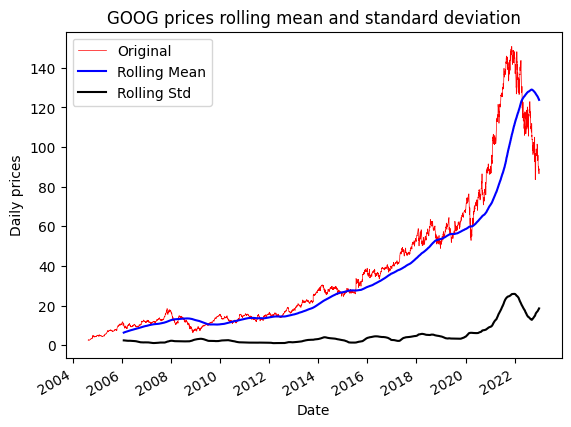

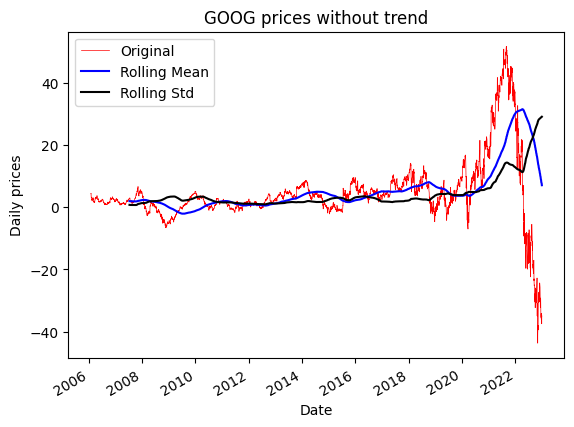

In [45]:
# 롤링 통계량
def plot_rolling_statistics_ts(ts, titletext,ytext, window_size=12):
    ts.plot(color='red', label='Original', lw=0.5)
    ts.rolling(window_size).mean().plot(
            color='blue',label='Rolling Mean')
    ts.rolling(window_size).std().plot(
            color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.ylabel(ytext)
    plt.title(titletext)
    plt.show(block=False)


plot_rolling_statistics_ts(goog_monthly_return[1:],'GOOG prices rolling mean and standard deviation','Monthly return')
plot_rolling_statistics_ts(goog_data['Adj Close'],'GOOG prices rolling mean and standard deviation','Daily prices',365)

plot_rolling_statistics_ts(goog_data['Adj Close']-goog_data['Adj Close'].rolling(365).mean(),'GOOG prices without trend','Daily prices',365)

Results of Dickey-Fuller Test:
Test Statistic                -1.530203e+01
p-value                        4.299678e-28
#Lags Used                     0.000000e+00
Number of Observations Used    2.180000e+02
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                   -0.368685
p-value                           0.915197
#Lags Used                       31.000000
Number of Observations Used    4592.000000
dtype: float64


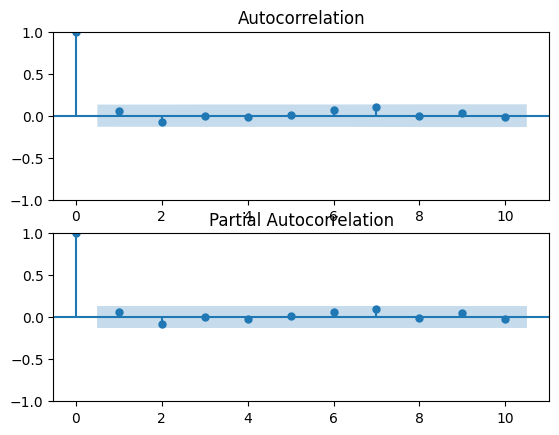

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [47]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries[1:], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    print (dfoutput)

test_stationarity(goog_monthly_return[1:])
test_stationarity(goog_data['Adj Close'])


from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

pyplot.figure()
pyplot.subplot(211)
plot_acf(goog_monthly_return[1:], ax=pyplot.gca(),lags=10)
pyplot.subplot(212)
plot_pacf(goog_monthly_return[1:], ax=pyplot.gca(),lags=10)
pyplot.show()

from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(goog_monthly_return[1:], order=(2, 0, 2))
fitted_results = model.fit()
goog_monthly_return[1:].plot()
fitted_results.fittedvalues.plot(color='red')
plt.show()